In [1]:
import warnings

import pandas as pd

import riskfolio as rp
from openbb_terminal.sdk import openbb
warnings.filterwarnings("ignore")

In [2]:
start = '2016-01-01'    # Provided Start date to pull stock data
end = '2019-12-30'      # Provided End date to stop pulling stock data

# Portfolio Symbols
symbols = ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
           'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
           'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T', 'BA']

#Data Stream
data = openbb.economy.index(symbols, start_date = start, end_date = end)

# Creates a Data Frame to Store all Data 
returns = data.pct_change().dropna()

In [3]:
returns         # Prints Dataframe as a check

,JCI,TGT,CMCSA,CPB,MO,APA,MMC,JPM,ZION,PSA,...,TMO,DE,MSFT,HPQ,SEE,VZ,CNP,NI,T,BA
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.011954,0.017539,0.000180,0.003678,0.020213,-0.020256,0.008284,0.001729,-0.010857,0.028236,...,-0.001730,0.005783,0.004562,0.009483,0.009758,0.013735,0.009305,0.015881,0.006987,0.004057
2016-01-06,-0.009551,-0.010155,-0.007727,-0.001736,0.010589,-0.114864,-0.012050,-0.014436,-0.029145,0.001592,...,-0.007653,-0.011239,-0.018165,-0.035867,-0.015646,-0.009035,-0.012473,0.005547,0.003108,-0.015879
2016-01-07,-0.025394,-0.002700,-0.011047,-0.012207,-0.017407,-0.051388,-0.007577,-0.040439,-0.030020,-0.010410,...,-0.022844,-0.008856,-0.034782,-0.046058,-0.031557,-0.005492,-0.019769,-0.022066,-0.016148,-0.041922
2016-01-08,-0.001649,-0.033838,0.001099,0.005707,0.001720,0.002736,-0.013966,-0.022399,-0.011254,-0.007308,...,-0.001117,-0.016401,0.003067,-0.017642,-0.001448,-0.009719,-0.002241,-0.001538,0.000895,-0.022705
2016-01-11,0.000330,0.014570,0.000915,0.005674,0.020948,-0.043383,-0.014542,-0.001528,-0.019919,0.009870,...,0.005367,0.005287,-0.000573,0.006616,-0.001450,0.005800,-0.011791,0.016435,0.012224,0.001693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,0.011286,0.003496,0.010312,0.019701,0.006694,-0.003963,0.000980,-0.000801,0.002719,0.006568,...,0.010735,0.010940,0.010918,0.012808,0.019573,0.020888,-0.001867,0.005433,0.005651,-0.016492
2019-12-23,-0.000243,-0.006272,0.000227,-0.001220,0.008214,0.172856,-0.009259,-0.000291,-0.005617,-0.006005,...,0.004040,0.002290,0.000000,0.000000,-0.004676,-0.010794,0.000000,-0.011167,-0.002044,0.029116
2019-12-24,-0.002184,0.001636,0.009750,0.002444,-0.008480,-0.013570,0.002606,0.002770,0.003701,-0.001760,...,-0.004664,-0.003142,-0.000191,0.001459,-0.003957,-0.001954,0.001122,-0.000729,-0.002815,-0.013480


In [4]:
#Builds the Portfolio Object
port = rp.Portfolio(returns = returns)
#Does this work with "returns" instead of "returns = returns"?

In [5]:
#Estimates Expected Returns and Covariance based on Historical Data Provided
port.assets_stats(method_mu = 'hist', method_cov = 'hist', d = 0.94)
# Method_MU is the method we use to calculate Expected Returns of the Portfolio
# Method_Cov is the method we use to calculate the covariance of the Portfolio



In [6]:
#Estimate the Optimal Portfolio with Risk Parity
w_rp = port.rp_optimization(
    model = "Classic", #use historical
    rm = "MV", #use mean-variance optimization
    hist = True, #use historical scenarios
    rf = 0, # Set Risk Free Rate to 0
    b = None #Don't use constraints
)


In [7]:
# add a constraint for the minimum level of expected returns
# for the entire portfolio increasing this will add more 
# weight to the "risk asset" which has higher historic returns
port.lowerret = 0.0008

#Estimate the Optimal Portfolio with Risk Parity
w_rp_c = port.rp_optimization(
    model = "Classic", #use historical
    rm = "MV", #use mean-variance optimization
    hist = True, #use historical scenarios
    rf = 0, # Set Risk Free Rate to 0
    b = None #Don't use constraints
)

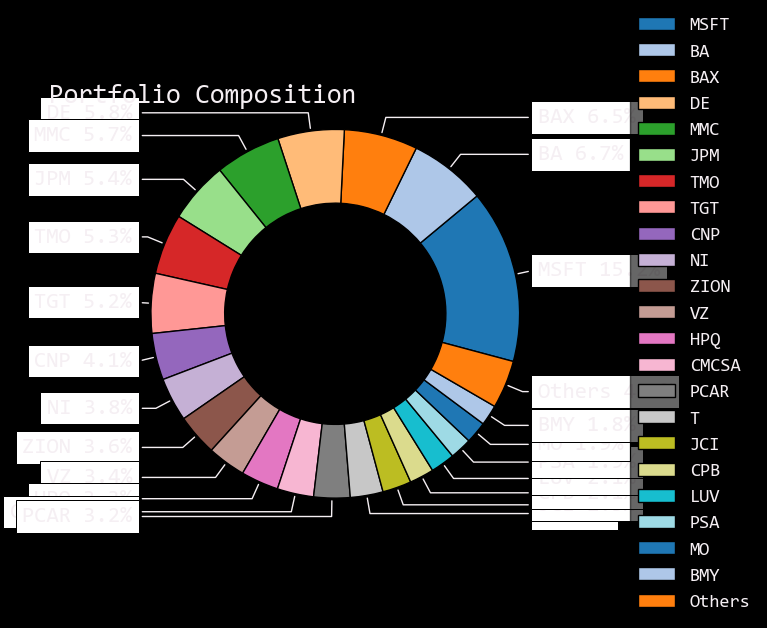

In [8]:
ax = rp.plot_pie(w = w_rp_c)   #Plots the Portfolio

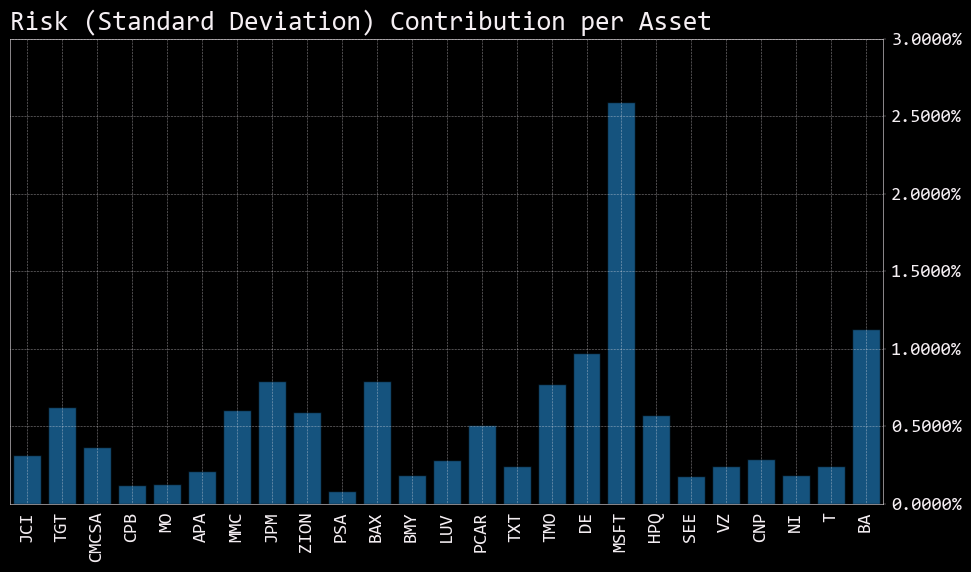

In [9]:

ax = rp.plot_risk_con(       # Show the risk contribution for each asset is equal
    w_rp_c,                  # Our estimated optimal portfolio through risk parity with the re
                             # With our Return Constraint "port.lowerret = 0.0008"
    cov = port.cov,          # The Portfolio's expected Co-Variance
    returns = port.returns,  # All the Daily return Data for each stock in the Portfolio 
    rm = "MV",               # Uses Mean-Variance Optimizaation
    rf = 0,                  # Sets Risk Free rate to 0
)